In [3]:
import numpy as np

In [4]:
X = np.load("X_features.npy")
y = np.load("y_labels.npy")

In [5]:
print("X shape:", X.shape)
print("y shape:", y.shape)
print("Unique emotions:", np.unique(y))


X shape: (1440, 180)
y shape: (1440,)
Unique emotions: ['angry' 'calm' 'disgust' 'fearful' 'happy' 'neutral' 'sad' 'surprised']


In [6]:
# Data handling
import numpy as np
import pandas as pd

# Model training and evaluation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For progress bars (optional, if you do feature extraction again)
from tqdm import tqdm

# Audio processing (if needed later)
import librosa


In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y  # stratify = keep class balance
)


In [8]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

model = SVC(kernel='rbf', C=10, gamma='scale')  # adjust if needed
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


              precision    recall  f1-score   support

       angry       0.56      0.58      0.57        38
        calm       0.35      0.89      0.51        38
     disgust       0.21      0.39      0.27        38
     fearful       0.56      0.23      0.33        39
       happy       0.35      0.18      0.24        39
     neutral       0.00      0.00      0.00        19
         sad       0.00      0.00      0.00        38
   surprised       0.40      0.44      0.41        39

    accuracy                           0.36       288
   macro avg       0.30      0.34      0.29       288
weighted avg       0.33      0.36      0.31       288

Accuracy: 0.3611111111111111


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [9]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


              precision    recall  f1-score   support

       angry       0.69      0.63      0.66        38
        calm       0.56      0.71      0.63        38
     disgust       0.40      0.50      0.44        38
     fearful       0.63      0.49      0.55        39
       happy       0.39      0.36      0.37        39
     neutral       0.43      0.32      0.36        19
         sad       0.49      0.45      0.47        38
   surprised       0.50      0.54      0.52        39

    accuracy                           0.51       288
   macro avg       0.51      0.50      0.50       288
weighted avg       0.52      0.51      0.51       288

Accuracy: 0.5104166666666666


Random Forest Daha Yaxsi netice gosterdi

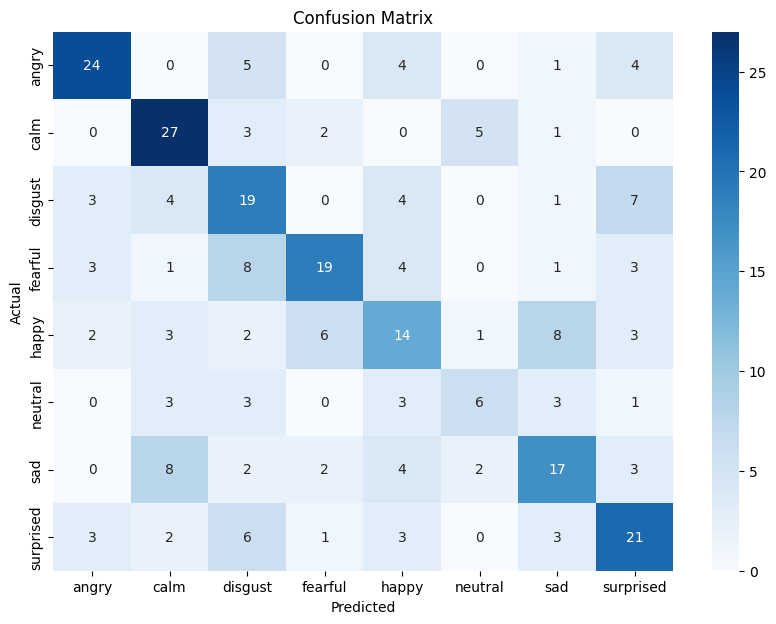

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score

model = RandomForestClassifier(n_estimators=100, random_state=42)

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model, X_scaled, y, cv=skf, scoring='accuracy')

print(f"Cross-validation accuracies: {scores}")
print(f"Mean CV accuracy: {scores.mean():.4f} ± {scores.std():.4f}")


Cross-validation accuracies: [0.54861111 0.53819444 0.56597222 0.53125    0.53819444]
Mean CV accuracy: 0.5444 ± 0.0121


Biraz Daha yaxsi netice alindi normalize etdikden sonra

In [13]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

model = SVC(kernel='rbf', C=10, gamma='scale')

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model, X_scaled, y, cv=skf, scoring='accuracy')

print(f"CV accuracies: {scores}")
print(f"Mean CV accuracy: {scores.mean():.4f} ± {scores.std():.4f}")


CV accuracies: [0.59722222 0.65277778 0.60416667 0.59027778 0.64930556]
Mean CV accuracy: 0.6188 ± 0.0268


Daha yaxsi netice alindi

Daha comlpex model yoxlayaq

In [25]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_encoded = le.fit_transform(y)  # Now y_encoded contains integers (e.g., 0, 1, 2, ...)


In [26]:
# Reshape again (just in case)
X_cnn = X.reshape((X.shape[0], X.shape[1], 1))

# Train/test split with encoded labels
X_train, X_test, y_train, y_test = train_test_split(
    X_cnn, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)



In [27]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization

model = Sequential([
    Conv1D(64, kernel_size=3, activation='relu', input_shape=(180, 1)),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),

    Conv1D(128, kernel_size=3, activation='relu'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.4),

    Dense(len(np.unique(y)), activation='softmax')  # Multi-class classification
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_4 (Conv1D)               │ (None, 178, 64)        │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 178, 64)        │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_4 (MaxPooling1D)  │ (None, 89, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 89, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_5 (Conv1D)               │ (None, 87, 128)        │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 87, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_5 (MaxPooling1D)  │ (None, 43, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 43, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 5504)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       704,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 8)              │         1,032 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 731,400 (2.79 MB)

 Trainable params: 731,016 (2.79 MB)

 Non-trainable params: 384 (1.50 KB)

In [28]:
history = model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=32,
    validation_data=(X_test, y_test)
)


Epoch 1/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.1881 - loss: 2.9319 - val_accuracy: 0.2361 - val_loss: 2.0416
Epoch 2/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.2096 - loss: 2.0071 - val_accuracy: 0.2361 - val_loss: 2.0247
Epoch 3/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2126 - loss: 1.9417 - val_accuracy: 0.2882 - val_loss: 1.9571
Epoch 4/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2413 - loss: 1.8828 - val_accuracy: 0.2569 - val_loss: 1.9283
Epoch 5/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2735 - loss: 1.8543 - val_accuracy: 0.3438 - val_loss: 1.9076
Epoch 6/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2504 - loss: 1.8440 - val_accuracy: 0.2778 - val_loss: 1.8415
Epoch 7/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2926 - loss: 1.7321 - val_accuracy: 0.3403 - val_loss: 1.8052
Epoch 8/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2937 - loss: 1.7598 - val_accuracy: 0.3576 - val_loss

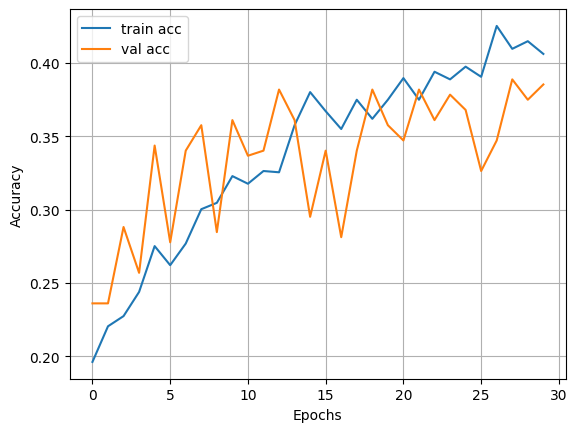

In [29]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


SVC modeli ile davam cnn yaxsi netice vermeyecek

In [30]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

model = SVC(kernel='rbf', C=10, gamma='scale')

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model, X_scaled, y, cv=skf, scoring='accuracy')

print(f"CV accuracies: {scores}")
print(f"Mean CV accuracy: {scores.mean():.4f} ± {scores.std():.4f}")

CV accuracies: [0.59722222 0.65277778 0.60416667 0.59027778 0.64930556]
Mean CV accuracy: 0.6188 ± 0.0268


In [33]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)

# Train
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Report
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

       angry       0.72      0.74      0.73        38
        calm       0.65      0.79      0.71        38
     disgust       0.54      0.66      0.60        38
     fearful       0.52      0.62      0.56        39
       happy       0.66      0.54      0.59        39
     neutral       0.54      0.37      0.44        19
         sad       0.53      0.42      0.47        38
   surprised       0.72      0.67      0.69        39

    accuracy                           0.61       288
   macro avg       0.61      0.60      0.60       288
weighted avg       0.62      0.61      0.61       288

[[28  1  3  1  1  0  3  1]
 [ 0 30  2  1  0  2  3  0]
 [ 3  2 25  2  2  1  1  2]
 [ 4  2  4 24  2  0  2  1]
 [ 3  0  3  9 21  1  0  2]
 [ 0  3  2  1  0  7  4  2]
 [ 0  8  3  5  3  1 16  2]
 [ 1  0  4  3  3  1  1 26]]


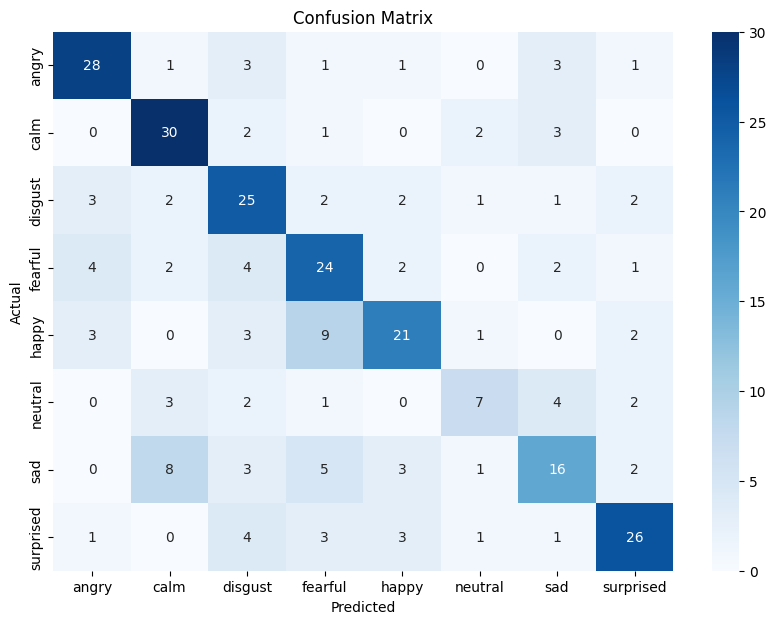

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


sad-calm, fearful-disgust aralarinda qarisiqliq ve neutral ile sad daha az netice verir.

In [38]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [41]:
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold

svc = SVC(kernel='rbf', C=10, gamma='scale', probability=True)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
knn = KNeighborsClassifier(n_neighbors=7)

ensemble = VotingClassifier(
    estimators=[('svc', svc), ('rf', rf), ('knn', knn)],
    voting='soft'
)

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(ensemble, X_scaled, y, cv=skf, scoring='accuracy')

print(f"CV accuracies: {scores}")
print(f"Mean CV accuracy: {scores.mean():.4f} ± {scores.std():.4f}")


CV accuracies: [0.64930556 0.66319444 0.62152778 0.63541667 0.67361111]
Mean CV accuracy: 0.6486 ± 0.0187


daha da yaxsiya dogru gedirik

In [44]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_scaled, y)

scores = cross_val_score(model, X_res, y_res, cv=skf, scoring='accuracy')
print(f"SMOTE CV Accuracy: {scores.mean():.4f} ± {scores.std():.4f}")


SMOTE CV Accuracy: 0.6497 ± 0.0115


In [45]:
import joblib

joblib.dump(model, 'svc_emotion_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(le, 'label_encoder.pkl')


['label_encoder.pkl']